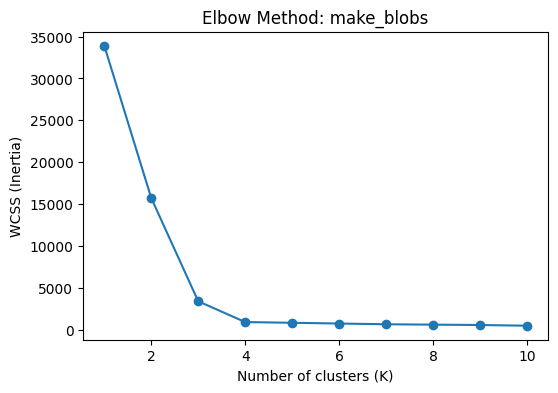

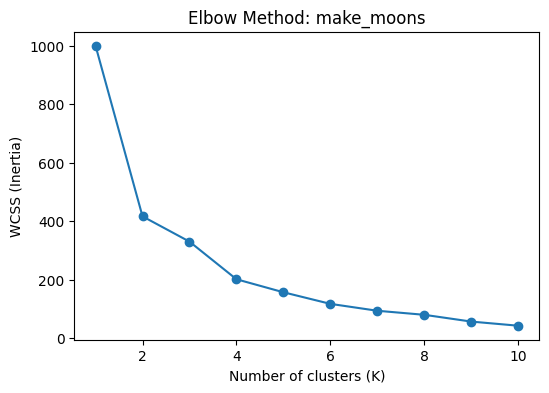

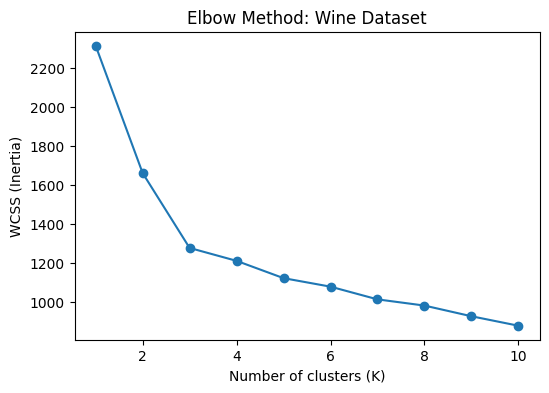

In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to plot elbow
def plot_elbow(X, title):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(6,4))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method: {title}')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('WCSS (Inertia)')
    plt.show()

# 1. make_blobs dataset
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, random_state=42)
plot_elbow(X_blobs, "make_blobs")

# 2. make_moons dataset (need to scale)
X_moons, y_moons = make_moons(n_samples=500, noise=0.05, random_state=42)
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)
plot_elbow(X_moons_scaled, "make_moons")

# 3. Wine dataset
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
plot_elbow(X_wine, "Wine Dataset")


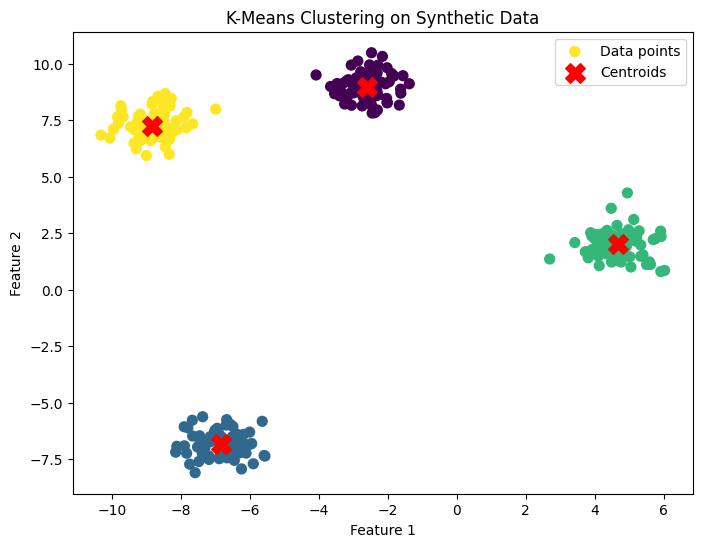

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Visualize the clusters and cluster centers
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [3]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps and min_samples can be tuned
dbscan.fit(X_scaled)

# Step 4: Extract cluster labels
labels = dbscan.labels_

# Step 5: Count the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters found (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters found (excluding noise): 0
Number of noise points: 178


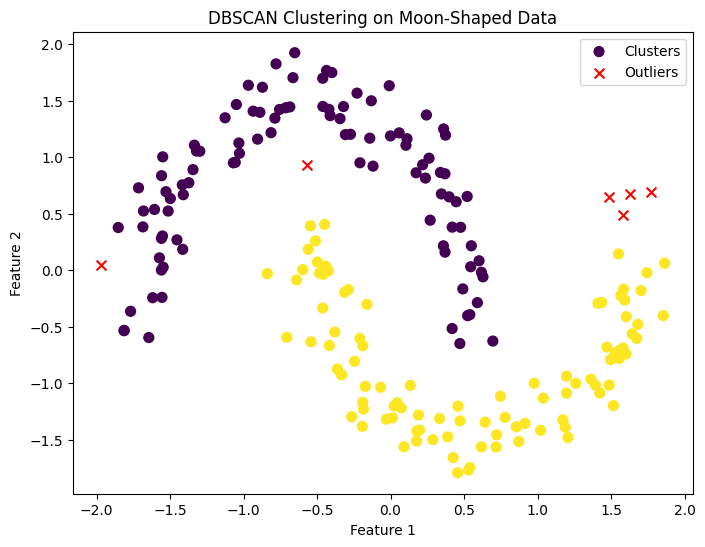

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped data
X, y_true = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps and min_samples tuned for moons
dbscan.fit(X_scaled)
labels = dbscan.labels_

# Step 4: Identify core, border, and noise points
core_samples_mask = dbscan.core_sample_indices_
outliers = labels == -1

# Step 5: Plot clusters and outliers
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='viridis', s=50, label='Clusters')
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1],
            c='red', s=50, marker='x', label='Outliers')
plt.title("DBSCAN Clustering on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


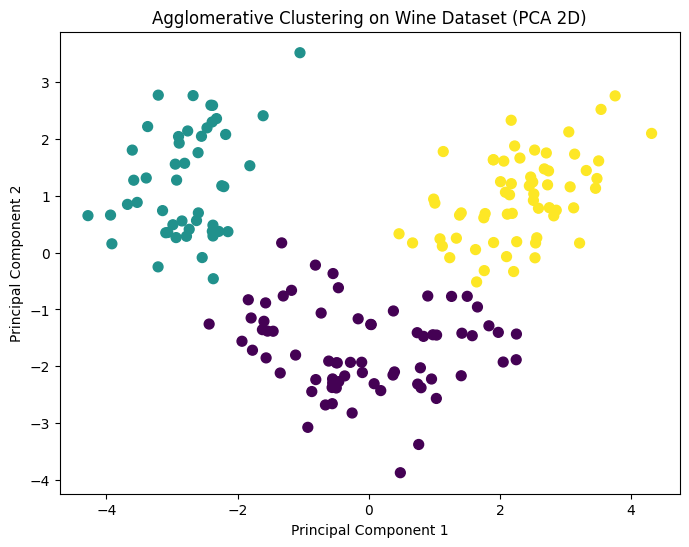

In [8]:
 # Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
# DO NOT pass 'affinity' or 'metric' with linkage='ward'
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X_pca)

# Step 5: Visualize clusters in 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



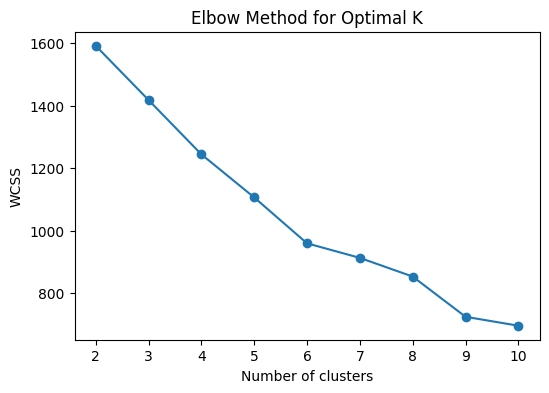

Silhouette Score: 0.22760020114442003


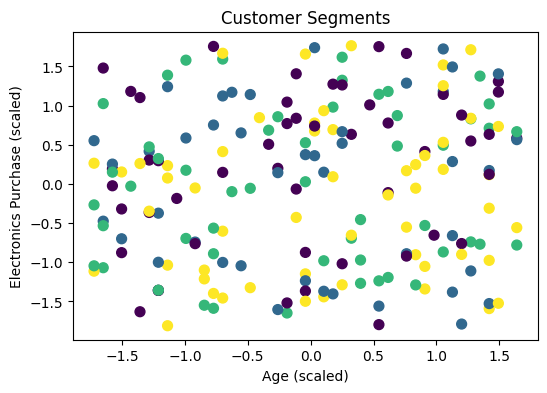

   Age  Gender Region  Electronics  Clothing  Grocery  Cluster
0   56  Female  North         4646      2779     1297        3
1   46    Male  South         1635      2799     1529        2
2   32  Female  North         1757       924      805        3
3   60    Male  South         4452      2956      738        2
4   25    Male   East         2070      1581     1906        1


In [13]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Generate synthetic customer dataset
# -----------------------------
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(18, 65, 200),
    'Gender': np.random.choice(['Male', 'Female'], 200),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 200),
    'Electronics': np.random.randint(0, 5000, 200),
    'Clothing': np.random.randint(0, 3000, 200),
    'Grocery': np.random.randint(0, 2000, 200)
})

# -----------------------------
# Step 2: Handle missing values (none in synthetic, but included for workflow)
# -----------------------------
df.fillna({
    'Age': df['Age'].median(),
    'Gender': 'Unknown',
    'Region': 'Unknown',
    'Electronics': 0,
    'Clothing': 0,
    'Grocery': 0
}, inplace=True)

# -----------------------------
# Step 3: Encode categorical features
# -----------------------------
categorical_cols = ['Gender', 'Region']
encoder = OneHotEncoder(sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                       columns=encoder.get_feature_names_out(categorical_cols),
                       index=df.index)

# Combine numeric and encoded features
numeric_cols = ['Age', 'Electronics', 'Clothing', 'Grocery']
X = pd.concat([df[numeric_cols], encoded], axis=1)

# -----------------------------
# Step 4: Scale features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Step 5: Determine optimal K using Elbow Method
# -----------------------------
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# -----------------------------
# Step 6: Apply KMeans with chosen K (example: K=4)
# -----------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 7: Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# -----------------------------
# Step 8: Evaluate cluster quality
# -----------------------------
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", sil_score)

# -----------------------------
# Step 9: Visualize clusters (using first two numeric features)
# -----------------------------
plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Age (scaled)')
plt.ylabel('Electronics Purchase (scaled)')
plt.title('Customer Segments')
plt.show()

# -----------------------------
# Step 10: Show first few rows with cluster labels
# -----------------------------
print(df.head())
